# argopandas

[![Check](https://github.com/ArgoCanada/argopandas/actions/workflows/check.yaml/badge.svg)](https://github.com/ArgoCanada/argopandas/actions/workflows/check.yaml)
[![Codecov test coverage](https://codecov.io/gh/ArgoCanada/argopandas/branch/master/graph/badge.svg)](https://codecov.io/gh/ArgoCanada/argopandas?branch=master)

The goal of argopandas is to provide seamless access to Argo NetCDF files using a pandas `DataFrame`-based interface. It is a Python port of the [argodata package for R](https://github.com/ArgoCanada/argodata). The package is under heavy development and we would love feedback on the interface or anything else about the package!

## Installation

You can install the `argopandas` package using `pip`.

``` bash
pip install git+https://github.com/ArgoCanada/argopandas.git
```

The package depends on `pandas`, `numpy`, and `netCDF4`, which you can install using `pip install pandas numpy netCDF4` or via your favourite Python package management system. The `argopandas` package requires Python 3.6 or later.

## Examples

The intended interface for most usage is contained in the `argopandas` module. You can import this as `argo` for pretty-looking syntax:

In [2]:
import argopandas as argo
# to make this work with GitHub
import pandas as pd
pd.set_option('display.notebook_repr_html', False)

The global indexes are available via `argo.prof`, `argo.meta`, `argo.tech`, `argo.traj`, `argo.bio_prof`, `argo.synthetic_prof`, and `argo.bio_traj`.

In [3]:
argo.meta.head(5)

                       file  profiler_type institution     date_update
0  aoml/13857/13857_meta.nc            845          AO  20181011200014
1  aoml/13858/13858_meta.nc            845          AO  20181011200015
2  aoml/13859/13859_meta.nc            845          AO  20181011200025
3  aoml/15819/15819_meta.nc            845          AO  20181011200016
4  aoml/15820/15820_meta.nc            845          AO  20181011200018

By defaut, downloads are lazily cached from the [Ifremer https mirror](https://data-argo.ifremer.fr). You can use `argo.url_mirror()` or `argo.file_mirror()` with `argo.set_default_mirror()` to point `argopandas` at your favourite copy of Argo.

To get Argo data from one or more NetCDF files, subset the indexes and use one of the table accessors to download, cache, and read variables aligned along common dimensions. The accessor you probably want is the `.levels` accessor from the `argo.prof` index:

In [4]:
argo.prof.head(5).levels[['PRES', 'TEMP']]

                                                          PRES       TEMP
file                              N_PROF N_LEVELS                        
aoml/13857/profiles/R13857_001.nc 0      0           11.900000  22.235001
                                         1           17.000000  21.987000
                                         2           22.100000  21.891001
                                         3           27.200001  21.812000
                                         4           32.299999  21.632000
...                                                        ...        ...
aoml/13857/profiles/R13857_005.nc 0      102        976.500000   4.527000
                                         103        986.700012   4.527000
                                         104        996.799988   4.533000
                                         105       1007.000000   4.487000
                                         106       1017.200012   4.471000

[551 rows x 2 columns]

You can get data from every variable in an Argo NetCDF file using one of these accessors. The variables grouped in each are aligned along the same dimensions and are documented together in the Argo user's manual.

- All indexes have a `.info` accessor that contains length-one variables that aren't aligned along any dimensions
- `argo.prof`: `argo.prof.levels`, `arog.prof.prof`, `argo.prof.calib`, `argo.prof.param`, and `argo.prof.history`
- `argo.traj`: `argo.traj.cycle`, `argo.traj.measurement`, `argo.traj.param`, and `argo.traj.history`
- `argo.tech`: `argo.tech.tech_param`
- `argo.meta`: `argo.meta.config_param`, `argo.meta.missions`, `argo.meta.trans_system`, `argo.meta.positioning_system`, `argo.meta.launch_config_param`, `argo.meta.sensor`, and `argo.meta.param`

Once you have a data frame you do anything you'd do with a regular `pd.DataFrame()`, like plot your data using the built-in plot method:

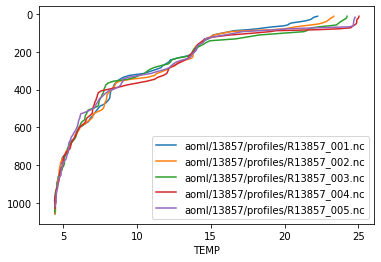

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for label, df in argo.prof.head(5).levels.groupby('file'):
    df.plot(x='TEMP', y = 'PRES', ax=ax, label=label)
ax.invert_yaxis()